# Complex analysis with the Discrete Fourier Transform (DFT)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Reminder: simple analysis

[0.5, 0.25, 0.25, 0.125] [0.5   0.25  0.25  0.125] [0.5   0.25  0.25  0.125]


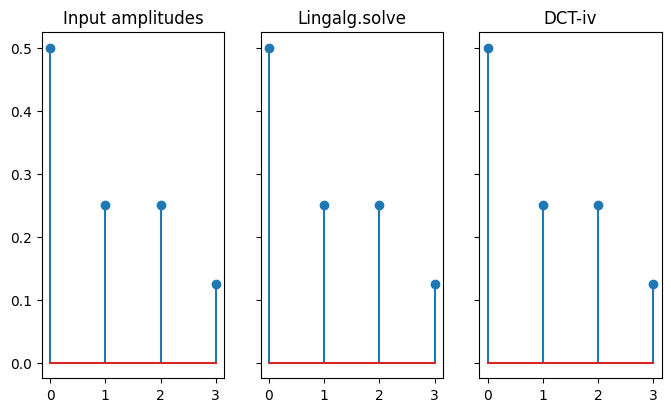

In [3]:
# adapted from thinkdsp p65
def synthesize_simple(amps, fs, ts):
    args = np.outer(ts, fs) # 
    M = np.cos(np.pi*2 * args) 
    ys = np.dot(M, amps)
    return ys

# thinkdsp p67
def analyze_simple(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(np.pi*2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

# ThinkDSP p70
def dct_iv(ys):
    N = len(ys)
    ts = (0.5 + np.arange(N)) / N
    fs = (0.5 + np.arange(N)) / 2
    args = np.outer(ts, fs)
    M = np.cos(np.pi* 2 * args)
    amps = np.dot(M, ys) / (N/2) 
    return amps


amps = [0.5, 0.25, 0.25, 0.125]
#amps = np.linspace(0.001, 1, N)
N = len(amps)
# for DCT, need specific frequencies and phases
ts = (0.5 + np.arange(N)) / N
fs = (0.5 + np.arange(N)) / 2

# synthesize
signal = synthesize_simple(amps, fs, ts)

# analyse
amps2 = analyze_simple(signal, fs, ts)
amps3 = dct_iv(signal)

fig,ax = plt.subplots(ncols=3, sharey=True, figsize=[8, 4.5])

ax[0].stem(amps)
ax[0].set_title("Input amplitudes")
ax[1].stem(amps2)
ax[1].set_title("Lingalg.solve")
ax[2].stem(amps3)
ax[2].set_title("DCT-iv")

print(amps, amps2, amps3)


# Complex analysis

Text(0.5, 1.0, 'Analyed amplitudes (real)')

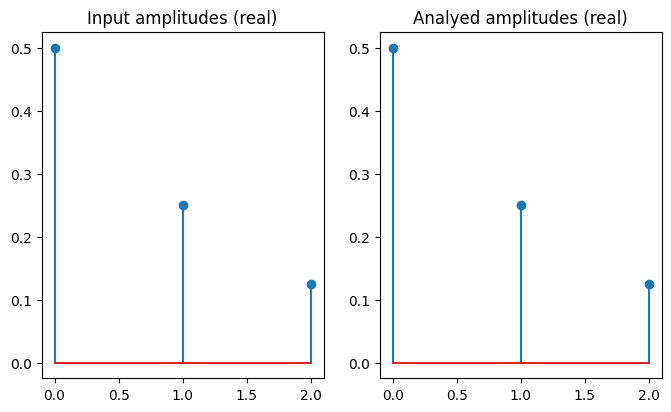

In [4]:
# from thinkdsp p80
def synthesize_complex(amps, fs, ts):
    args = np.outer(ts, fs)
    M = np.exp(1j * (np.pi*2 * args)) # 1j converts to complex 
    ys = np.dot(M, amps)
    return ys

# thinkdsp p82
def analyze_complex(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.exp(1j * np.pi * 2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

# phi is the phase offset for the synthesis, in radians
phi = 0 # in radians
amps = np.array([0.5, 0.25, 0.125])
amps = amps * np.exp(1j * phi)
freqs = np.array([1, 2, 3])
times = np.linspace(0, 1, 100)

# synthesize
signal_complex = synthesize_complex(amps, freqs, times)

# analyse
amps2 = analyze_complex(signal_complex[0:len(freqs)], freqs, times[0:len(freqs)])

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=[8,4.5])

ax[0].stem(amps.real)
ax[0].set_title("Input amplitudes (real)")
ax[1].stem(amps2.real)
ax[1].set_title("Analyed amplitudes (real)")



## Complex analysis without the linalg.solve call

Text(0.5, 1.0, 'Analyed amplitudes (real)')

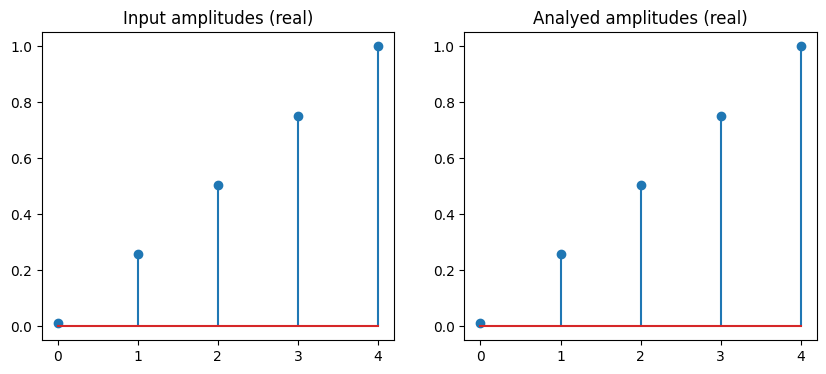

In [5]:
# thinkdsp p83
# nearly DFT as the DFT removes the /N on the last line
def analyze_nearly_dft(ys, fs, ts):
    N = len(fs)
    args = np.outer(ts, fs)
    M = np.exp(1j * np.pi * 2 * args)
    amps = M.conj().transpose().dot(ys) / N # actual DFT removes the / N
    return amps

amps = np.array([0.6, 0.25, 0.1, 0.05, 0.5])

amps = np.linspace(0.01, 1, 5)

N = len(amps)

fs = np.arange(N)
ts = np.arange(N) / N
ys = synthesize_complex(amps, fs, ts)
amps2 = analyze_nearly_dft(ys, fs, ts)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=[10,4])

ax[0].stem(amps.real)
ax[0].set_title("Input amplitudes (real)")
ax[1].stem(amps2.real)
ax[1].set_title("Analyed amplitudes (real)")


## Complex analysis with DFT that calculates its own frequency array
and comparison to FFT output

Text(0.5, 1.0, 'np.fft analysed (real)')

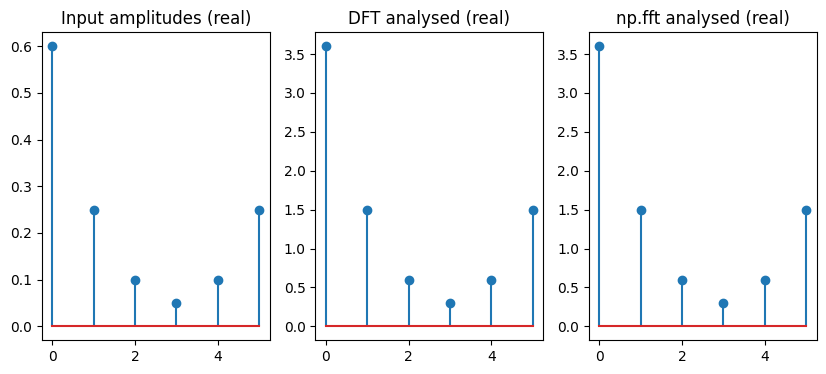

In [6]:
# thinkdsp p84
def synthesis_matrix(N):
    ts = np.arange(N) / N
    fs = np.arange(N)
    args = np.outer(ts, fs)
    M = np.exp(1j * np.pi*2 * args)
    return M

# thinkdsp p84
def dft(ys):
    N = len(ys)
    M = synthesis_matrix(N)
    amps = M.conj().transpose().dot(ys)
    return amps



amps_in = np.array([0.6, 0.25, 0.1, 0.05, 0.1, 0.25])
N = len(amps_in)
fs = np.arange(N)
ts = np.arange(N) / N
ys = synthesize_complex(amps_in, fs, ts)

amps_dft = dft(ys)
amps_fft = np.fft.fft(ys)

fig,ax = plt.subplots(ncols=3, nrows=1, figsize=[10,4])

ax[0].stem(amps_in.real)
ax[0].set_title("Input amplitudes (real)")
ax[1].stem(amps_dft.real)
ax[1].set_title("DFT analysed (real)")
ax[2].stem(amps_fft.real)
ax[2].set_title("np.fft analysed (real)")




In [6]:
## 

Text(0.5, 1.0, 'Analyed amplitudes (real)')

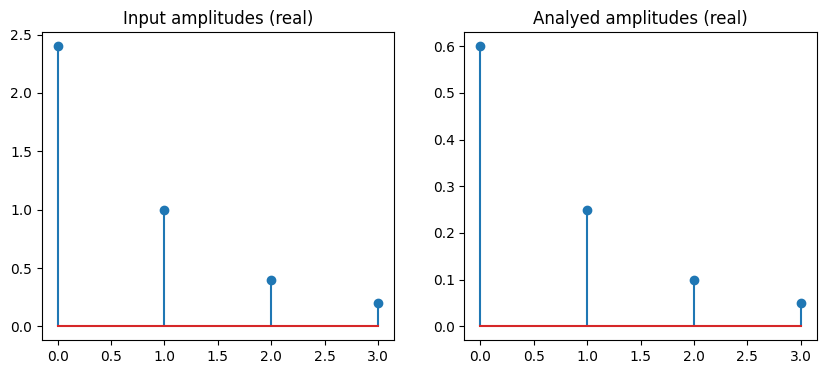

In [7]:
def synthesis_matrix(N):
    ts = np.arange(N) / N
    fs = np.arange(N)
    args = np.outer(ts, fs)
    M = np.exp(1j * np.pi*2 * args)
    return M

def dft(ys):
    N = len(ys)
    M = synthesis_matrix(N)
    amps = M.conj().transpose().dot(ys)
    return amps

N = 4
amps = np.array([0.6, 0.25, 0.1, 0.05])
fs = np.arange(N)
ts = np.arange(N) / N
ys = synthesize_complex(amps, fs, ts)
amps2 = analyze_nearly_dft(ys, fs, ts)

amps3 = np.fft.fft(ys)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=[10,4])



ax[0].stem(amps3.real)
ax[0].set_title("Input amplitudes (real)")
ax[1].stem(amps.real)
ax[1].set_title("Analyed amplitudes (real)")

